In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

16000


(0.0, 0.02)

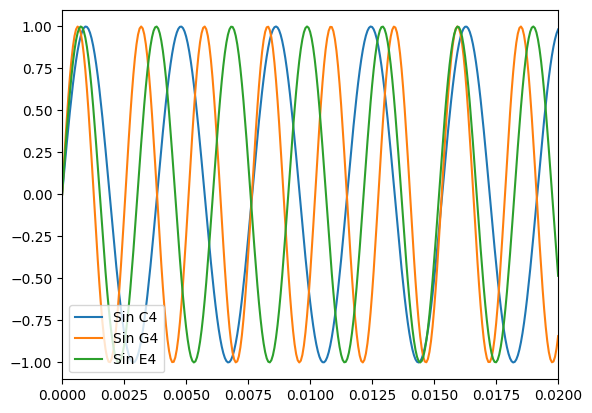

In [15]:
# Skapa tre sinusvågor med numpy i jupyter notebook
# C4 = 261.63 hz
# G4 = 392.00 hz
# E4 = 329.63 hz

time = np.linspace(0,1, num=16000)
tone_C4 = np.sin(2 * np.pi * 261 * time )
tone_G4 = np.sin(2 * np.pi * 392 * time )
tone_E4 = np.sin(2 * np.pi * 329 * time )
print(len(tone_C4))


plt.plot(time, tone_C4, label = "Sin C4")
plt.plot(time, tone_G4 ,label = "Sin G4")
plt.plot(time, tone_E4, label ="Sin E4")
plt.legend(loc="lower left")
plt.xlim(0,0.02)


# addera ihop dem för att skapaett vackert C-accord
C_accord = tone_C4 + tone_G4 + tone_E4

(0.0, 0.02)

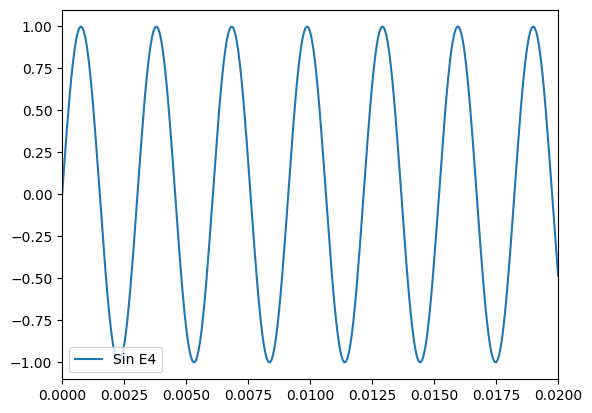

In [19]:
#  Rita en linjegraf för att se på vågformen
plt.plot(time, tone_E4, label ="Sin E4")
plt.legend(loc="lower left")
plt.xlim(0,0.02)

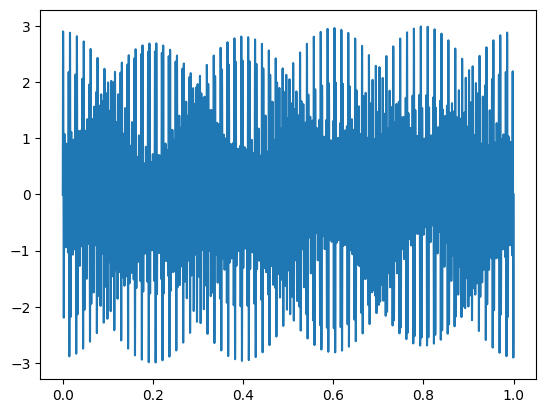

In [21]:
C_accord = tone_C4 + tone_G4 + tone_E4
plt.plot(time, C_accord )


# skriv ut en wavfil med hjälp scipy 
from scipy.io.wavfile import write
write("C_accord.wav",16000 , C_accord)


# Exportera dina två arrays som kolumner i en .csv fil.
tone_C4.tofile("tone_C4.csv", sep=",")
C_accord.tofile("C_accord.csv", sep=",")